Textarea(value='[]', description='points:')

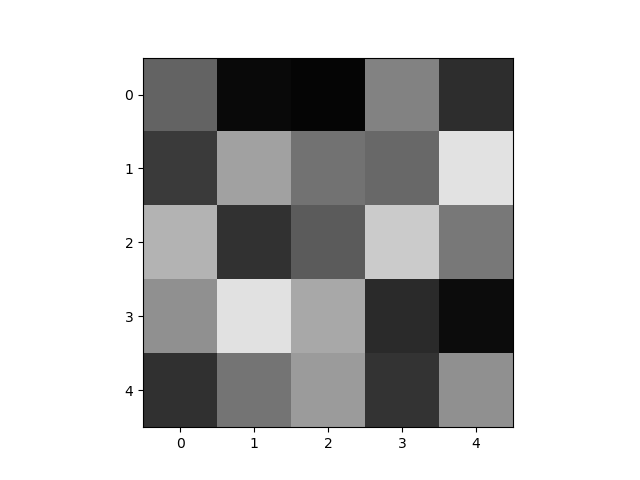

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as wdg

# Create a random black and white image
mat = np.random.random((5,5))
dispmat = np.stack([mat,mat,mat], axis=-1)

# Plot it
fig = plt.figure()
plt.imshow(dispmat)

# List for selected pixels
selected = []

# Create a text area for displaying the selected pixels
text_area = wdg.Textarea(
    value = str(selected),
    description = "points:",
    disabled = False
)
display(text_area)

# Function to run when a pixel is clicked
def onclick(event):
    ''' Add the clicked pixel to the list of selected pixels and
    display it as red in the image.
    '''
    global selected
    x = int(event.xdata+0.5)
    y = int(event.ydata+0.5)
    if (y, x) in selected:
        dispmat[y,x,:] = [mat[y,x], mat[y,x], mat[y,x]]
        selected.remove((y, x))
    else:
        dispmat[y,x,:] = [1,0,0]
        selected += [(y, x)]
    text_area.value = str(selected)  # str(dir(event))
    plt.imshow(dispmat)
    fig.canvas.draw()
    
ka = fig.canvas.mpl_connect('button_press_event', onclick)